In [44]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

**Step 1: Loading and Understanding the Dataset**

In [10]:
# Creaing data frame
df = pd.read_csv('/content/drive/MyDrive/Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [11]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


**Step 2: Exploratory Data Analysis (EDA)**

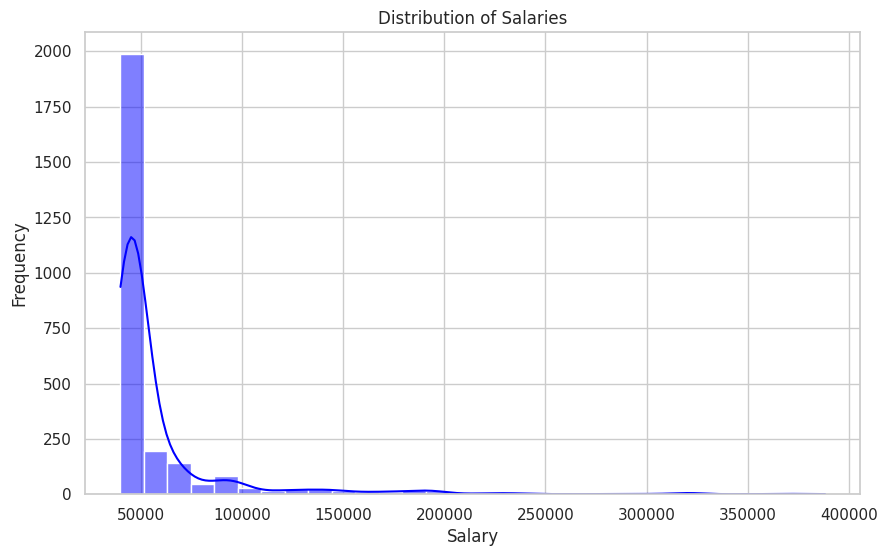

In [15]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of the Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True, color='blue', bins=30)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-d17d5eaa9ef8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DESIGNATION', y='SALARY', data=df, palette='Set2')


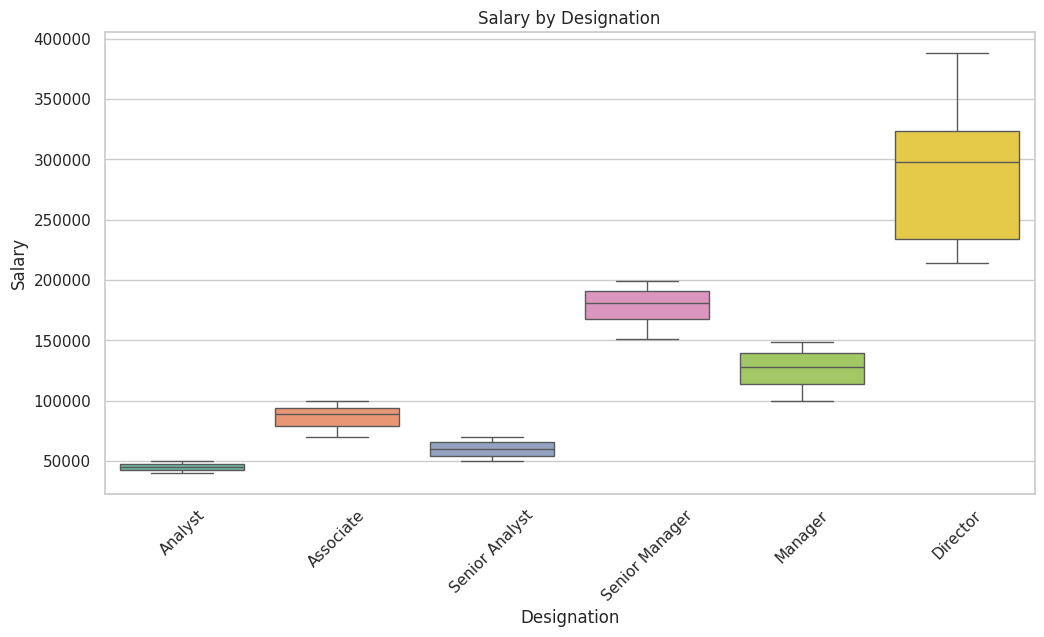

In [17]:
# Plot the relationship between Designation and Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df, palette='Set2')
plt.title('Salary by Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-36173d80383d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEX', y='SALARY', data=df, palette='Set1')


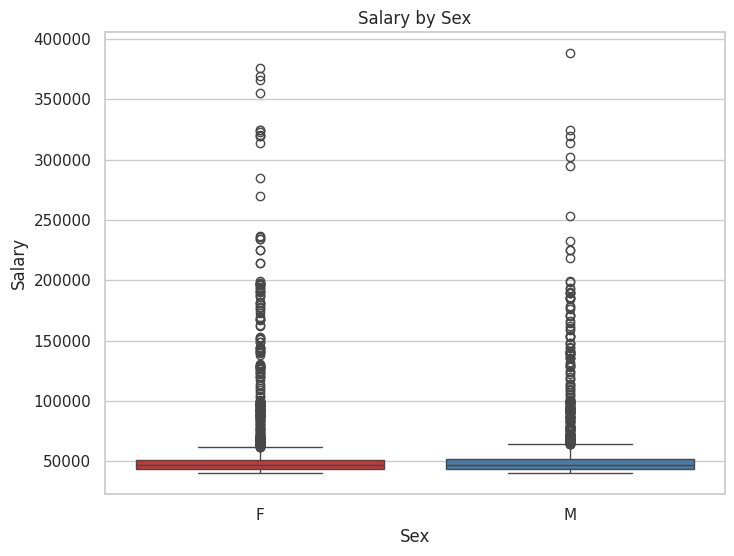

In [18]:
# Plot the relationship between Sex and Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='SEX', y='SALARY', data=df, palette='Set1')
plt.title('Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()


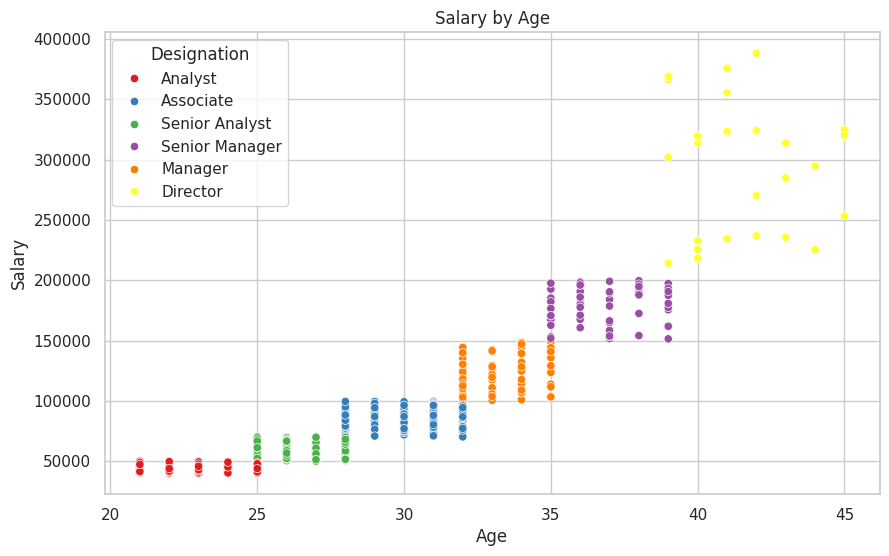

In [20]:
# Plot the relationship between Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=df, hue='DESIGNATION', palette='Set1')
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Designation')
plt.show()


<ipython-input-22-2e15482a397b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='UNIT', y='SALARY', data=df, palette='Set3')


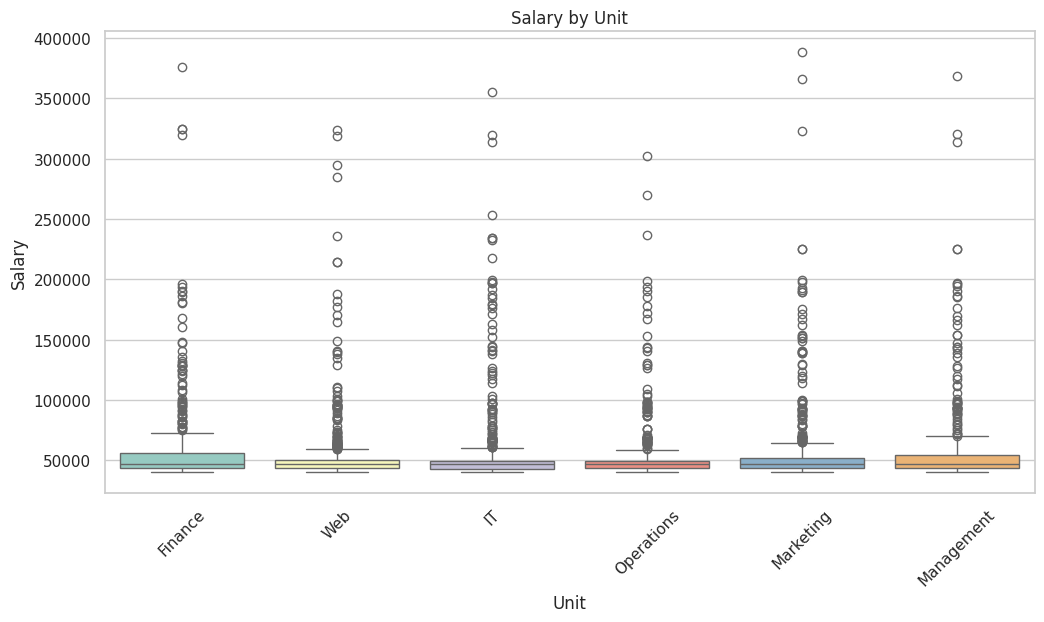

In [22]:
# Plot the relationship between Unit and Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='UNIT', y='SALARY', data=df, palette='Set3')
plt.title('Salary by Unit')
plt.xlabel('Unit')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


**Step 3: Data Preprocessing**

In [26]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [29]:
# Handling missing values

# Filling missing values for 'LAST NAME' with an empty string
df['LAST NAME'].fillna('', inplace=True)

# Filling missing numeric values with median
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].median(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)

# Converting date columns to datetime format
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors='coerce')

# Dropping rows with missing dates after conversion
df.dropna(subset=['DOJ', 'CURRENT DATE'], inplace=True)

# Display the processed dataset
df.head()


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3
5,VICTORIA,,F,2013-02-19,2016-01-07,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0


In [32]:
# Encoding categorical variables
data = pd.get_dummies(df, columns=['SEX', 'DESIGNATION', 'UNIT'], drop_first=True)

# Display the updated dataset
data.head()


,FIRST NAME,LAST NAME,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,...,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,TOMASA,ARMEN,2014-05-18,2016-01-07,21.0,44570,24.0,6.0,2.0,0,...,False,False,False,False,False,False,False,False,False,False
2,OLIVE,ANCY,2014-07-28,2016-01-07,21.0,40955,23.0,7.0,3.0,0,...,False,False,False,False,False,False,False,False,False,False
3,CHERRY,AQUILAR,2013-04-03,2016-01-07,22.0,45550,22.0,8.0,3.0,0,...,False,False,False,False,False,True,False,False,False,False
4,LEON,ABOULAHOUD,2014-11-20,2016-01-07,24.0,43161,27.0,3.0,3.0,3,...,False,False,False,False,False,False,False,False,True,False
5,VICTORIA,,2013-02-19,2016-01-07,22.0,48736,20.0,10.0,4.0,0,...,False,False,False,False,False,False,False,True,False,False


**Step 4: Feature Engineering**

In [33]:
# Calculating tenure in years based on DOJ and CURRENT DATE
data['TENURE'] = (data['CURRENT DATE'] - data['DOJ']).dt.days / 365.25

# Dropping original date columns as they've been used to create TENURE
data.drop(['DOJ', 'CURRENT DATE'], axis=1, inplace=True)

# Display the updated dataset with new features
data.head()

,FIRST NAME,LAST NAME,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_M,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,TENURE
0,TOMASA,ARMEN,21.0,44570,24.0,6.0,2.0,0,False,False,False,False,False,False,False,False,False,False,False,1.639973
2,OLIVE,ANCY,21.0,40955,23.0,7.0,3.0,0,False,False,False,False,False,False,False,False,False,False,False,1.445585
3,CHERRY,AQUILAR,22.0,45550,22.0,8.0,3.0,0,False,False,False,False,False,False,True,False,False,False,False,2.762491
4,LEON,ABOULAHOUD,24.0,43161,27.0,3.0,3.0,3,True,False,False,False,False,False,False,False,False,True,False,1.130732
5,VICTORIA,,22.0,48736,20.0,10.0,4.0,0,False,False,False,False,False,False,False,False,True,False,False,2.880219


**Step 5: Model Development**

In [37]:
# Splitting the data into features and target variable
X = data.drop(['FIRST NAME', 'LAST NAME', 'SALARY'], axis=1)
y = data['SALARY']

In [38]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [40]:
# Training and evaluating models
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_performance[name] = score

model_performance

{'Linear Regression': 0.9568361479335342,
 'Decision Tree': 0.9163732024905561,
 'Random Forest': 0.947909216251234,
 'Gradient Boosting': 0.9457418642489963}

**Step 6: Model Evaluation**

In [42]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


In [43]:
# Evaluating all models
evaluation_results = {}
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

evaluation_results

{'Linear Regression': {'MAE': 4291.335088751506,
  'MSE': 63262617.97665174,
  'RMSE': 7953.780106128893,
  'R2': 0.9568361479335342},
 'Decision Tree': {'MAE': 5321.9375,
  'MSE': 122566682.30871212,
  'RMSE': 11070.98380039968,
  'R2': 0.9163732024905561},
 'Random Forest': {'MAE': 4314.016714015152,
  'MSE': 76346275.75240844,
  'RMSE': 8737.635592791017,
  'R2': 0.947909216251234},
 'Gradient Boosting': {'MAE': 4502.417490051817,
  'MSE': 79522831.02202067,
  'RMSE': 8917.557458296564,
  'R2': 0.9457418642489963}}

**Step 7: ML Pipelines**

In [45]:
# Create a pipeline that handles missing values, scales the data, and applies the model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [46]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [50]:
# Predicting with the pipeline
y_pred = pipeline.predict(X_test)


In [51]:
# Evaluating the pipeline
pipeline_mae = mean_absolute_error(y_test, y_pred)
pipeline_mse = mean_squared_error(y_test, y_pred)
pipeline_rmse = np.sqrt(pipeline_mse)
pipeline_r2 = r2_score(y_test, y_pred)

pipeline_evaluation = {
    'MAE': pipeline_mae,
    'MSE': pipeline_mse,
    'RMSE': pipeline_rmse,
    'R2': pipeline_r2
}

pipeline_evaluation

{'MAE': 4495.945450619876,
 'MSE': 77895049.19075894,
 'RMSE': 8825.817196767613,
 'R2': 0.9468524938183731}

**Step 8: Recommendations**

**For Job Seekers**

**Gain Experience:** Work in your field to build experience. More experience usually means higher pay.

**Choose Good Jobs:** Look for roles with more responsibility or in departments like IT or Operations. These often pay more.

**Keep Learning:** Stay up-to-date with new skills, especially in areas like AI and machine learning. Use this knowledge to ask for fair pay.

**For Employers**

**Help Employees Grow:** Provide training and chances to advance. This helps keep employees and justifies paying them more.

**Pay Fairly:** Regularly check that salaries are fair across all roles and departments. Fix any unfair differences and be clear about how you set pay.

**Reward Hard Work:** Give bonuses or raises for good performance. Keep up with salary trends to attract and retain top talent.